In [21]:
from pykrx import stock
import pandas as pd
import numpy as np
import json
from datetime import datetime

In [22]:
# import plotly.io as pio
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# pio.renderers.default='browser'  

# def get_candlestick_chart(df: pd.DataFrame):  

#     # Make Plots
#     fig = make_subplots(
#         rows=3,
#         cols=1,
#         shared_xaxes=True,
#         vertical_spacing=0.1,
#         subplot_titles=(f"Stock Price", "Volume", "RangePerVolume")
#     )

#     # Remove holidays
#     dt_all = pd.date_range(start=df.index[0], end=df.index[-1])
#     dt_breaks = [ d for d in dt_all.strftime("%Y-%m-%d").to_list() if not d in df.index.astype('str').to_list() ]
#     fig.update_xaxes(rangebreaks=[dict(values=dt_breaks)])

#     # Candle Sticks Box
#     fig.add_trace(
#         go.Candlestick(
#             x = df.index,
#             open = df['시가'], 
#             high = df['고가'],
#             low = df['저가'],
#             close = df['종가'],
#             name = 'Candlestick chart'
#         ),
#         row = 1,
#         col = 1
#     ) 

#     # Moving Averages
#     ma_list = [5, 20, 60, 120]
#     color_list = ["green", "red", "orange", "purple"]

#     for i, c in zip(ma_list, color_list):
#         df[f"MA{i}"] = df['종가'].rolling(window=i).mean()
#         fig.add_trace(
#                 go.Scatter(
#                 x=df.index,
#                 y=df[f"MA{i}"],
#                 opacity=0.2,
#                 line=dict(color=f"{c}", width=2),
#                 name=f"MA {i}"
#             ),
#             row=1,
#             col=1
#         )

#     # Volume Box
#     fig.add_trace(
#         go.Bar(x = df.index, y = df["거래량"], name="Volume"),
#         row=2,
#         col=1
#     )

#     # Range Per Volume Box
#     fig.add_trace(
#         go.Bar(x = df.index, y = df["RangePerVolume"], name="RangePerVolume"),
#         row=3,
#         col=1
#     )

#     fig['layout']['xaxis2']['title'] = "Date"
#     fig['layout']['yaxis']['title'] = "Price"
#     fig['layout']['yaxis2']['title'] = "Volume"
#     fig['layout']['yaxis3']['title'] = "RangePerVolume"

#     # Remove range slider
#     fig.update_xaxes(
#         rangeslider_visible = False,
#         ) 

#     return fig

In [23]:
# tickers = stock.get_market_ticker_list(market="KOSPI")
# ticker_name = {stock.get_market_ticker_name(ticker):ticker for ticker in tickers}
# with open("KOSDAQ.json", "w") as of:
#     json.dump(ticker_name, of)

In [24]:
with open("KOSPI.json", "r") as f:
    ticker_dict = json.load(f)

with open("KOSDAQ.json", "r") as f:
    ticker_dict.update(json.load(f))


In [25]:
ticker = "하림"
df = stock.get_market_ohlcv("20210102", datetime.today().strftime("%Y%m%d"), ticker_dict[ticker])

In [26]:
df["Range"] = df["고가"] - df["저가"]
df["RangePerVolume"] = (df["Range"] / df["거래량"]) * 100_000

In [27]:
rpv_decile =df["RangePerVolume"].quantile(np.linspace(0.1,1.0,num=10))
vol_decile =df["거래량"].quantile(np.linspace(0.1,1.0,num=10))

In [28]:
df.columns = ["Open", "High", "Low", "Close", "Volume", "Returns", "Range", "RangePerVolume"]

In [29]:
df

,Open,High,Low,Close,Volume,Returns,Range,RangePerVolume
날짜,,,,,,,,
2021-01-04,2875,2885,2820,2855,928074,0.351494,65,7.003752
2021-01-05,2855,2875,2820,2870,1100921,0.525394,55,4.995817
2021-01-06,2910,2945,2875,2895,1804336,0.871080,70,3.879543
2021-01-07,2920,3070,2890,2980,4676650,2.936097,180,3.848909
2021-01-08,2990,2995,2910,2910,1961715,-2.348993,85,4.332943
...,...,...,...,...,...,...,...,...
2023-12-27,4900,5270,4235,4460,29552952,-0.888889,1035,3.502188
2023-12-28,4440,4630,4240,4380,10104465,-1.793722,390,3.859680
2024-01-02,4380,4490,4255,4430,5224420,1.141553,235,4.498107


In [30]:
# df.index.name = "Date"
# df = df.set_axis(["Open", "High", "Low", "Close", "Volume", "Change(%)", "Range", "RangePerVolume"], axis=1)

In [31]:
# fig = get_candlestick_chart(df)


In [32]:
# fig.add_trace(
#     go.Scatter(
#         name="Extreme",
#          x = [ df.index.min(), df.index.max()  ],
#          y = [rpv_decile.iloc[-2], rpv_decile.iloc[-2]],
#         mode = "lines",
#         marker = dict(color="blue"),
#         opacity=0.2
#     ), row=3, col=1
# )
# fig.add_trace(
#     go.Scatter(
#         name="Extreme",
#          x = [ df.index.min(), df.index.max()  ],
#          y = [vol_decile.iloc[-2], vol_decile.iloc[-2]],
#         mode = "lines",
#         marker = dict(color="blue"),
#         opacity=0.2
#     ), row=2, col=1
# )

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [34]:
rpv_return = df["RangePerVolume"].pct_change()

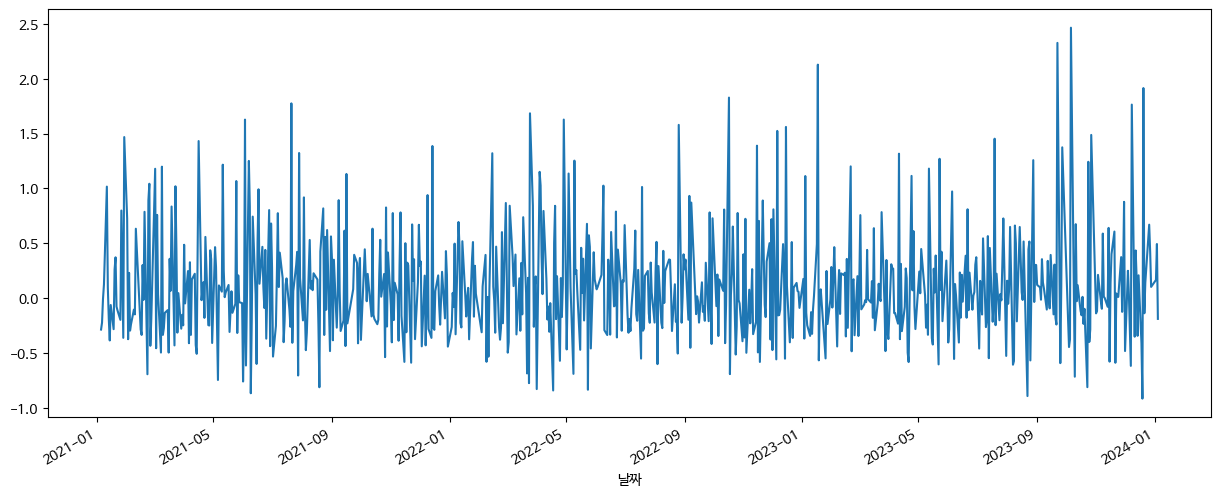

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,6))

rpv_return.plot(ax=ax, label="daily rpv changes");

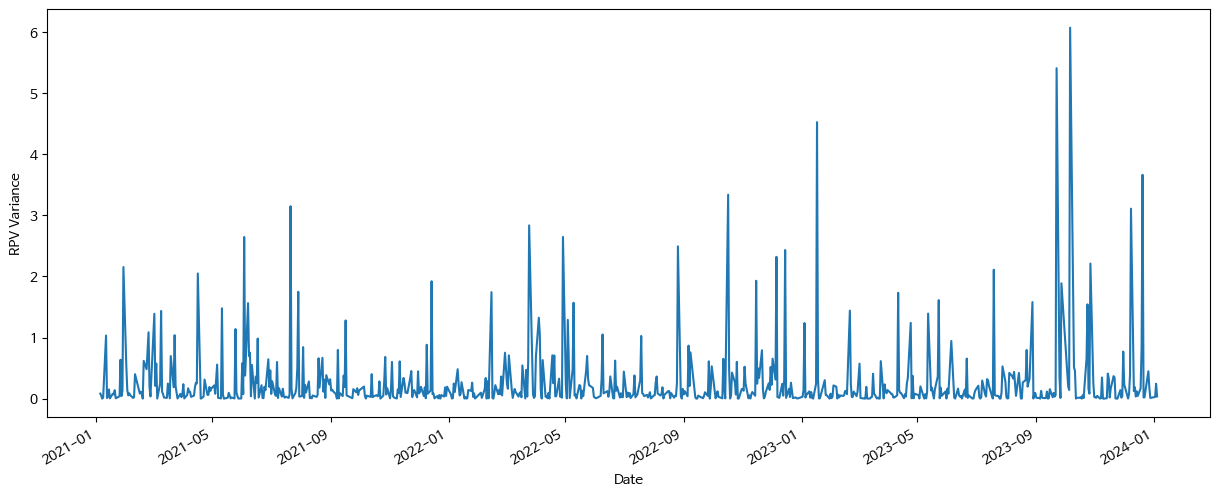

In [36]:
fig, ax = plt.subplots(figsize=(15,6))

(rpv_return**2).plot(ax=ax, label="RPV variance");

plt.xlabel("Date")
plt.ylabel("RPV Variance");


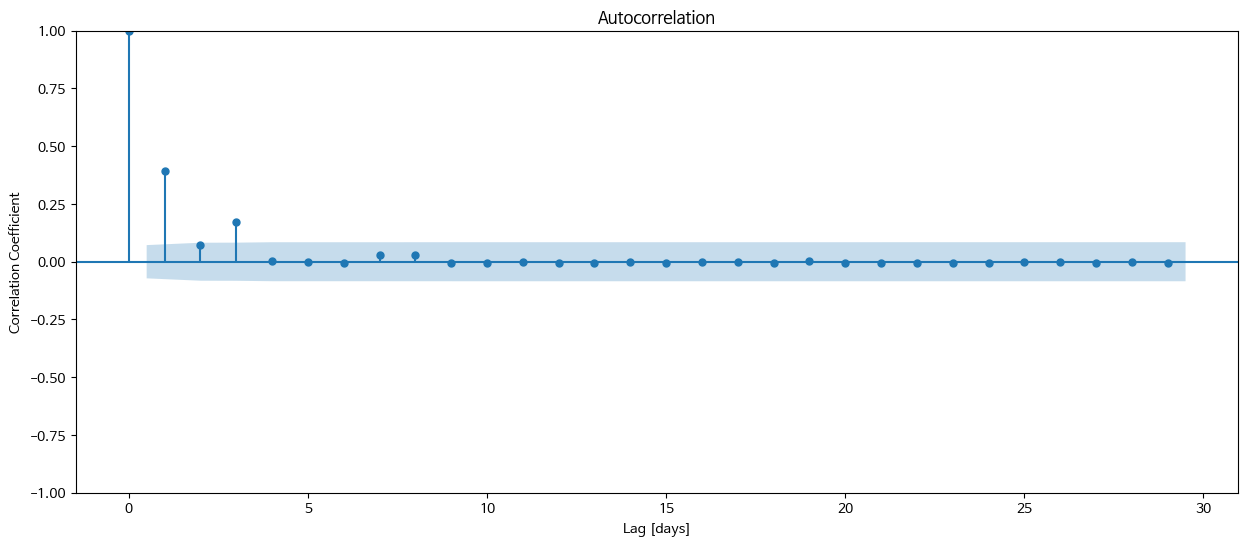

In [37]:
fig, ax = plt.subplots(figsize=(15, 6))

plot_acf(df["Returns"]**2, ax=ax)

plt.xlabel("Lag [days]")
plt.ylabel("Correlation Coefficient");

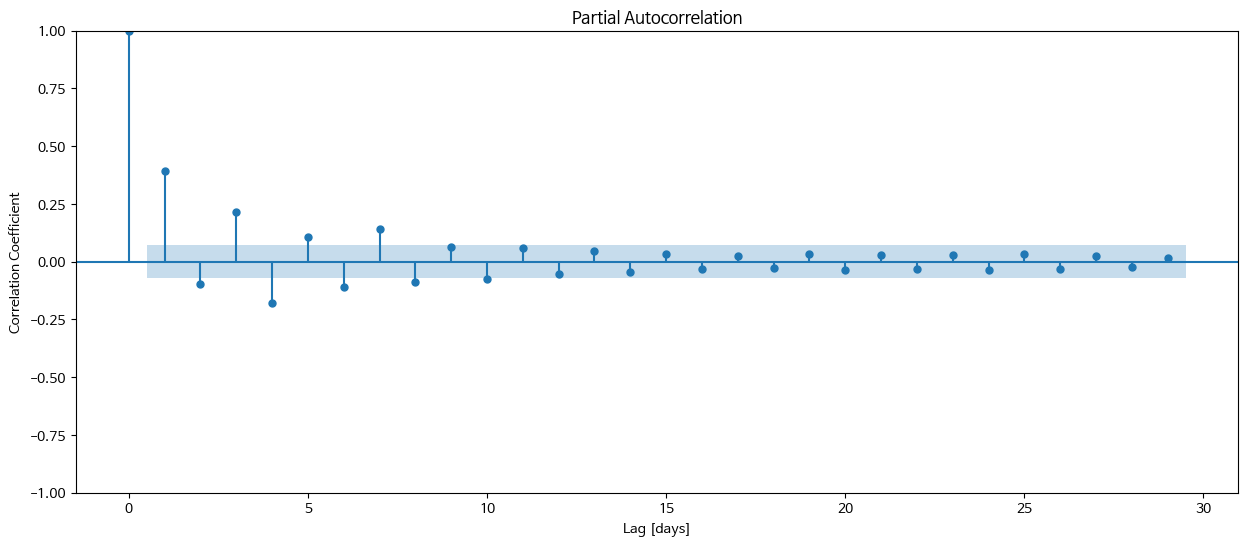

In [38]:
fig, ax = plt.subplots(figsize=(15, 6))

plot_pacf(df["Returns"]**2, ax=ax)

plt.xlabel("Lag [days]")
plt.ylabel("Correlation Coefficient");

In [39]:
from arch import arch_model
from sklearn.model_selection import train_test_split

In [44]:
# x_train, y_train, x_test, y_test = train_test_split()
stock_train = df["Returns"] * int(len(df) * 0.8)

model = arch_model(
    stock_train,
    p=1,
    q=1,
    rescale=False
).fit(disp=0)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6422.33
Distribution:                  Normal   AIC:                           12852.7
Method:            Maximum Likelihood   BIC:                           12871.1
                                        No. Observations:                  742
Date:                Thu, Jan 04 2024   Df Residuals:                      741
Time:                        16:34:51   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            33.4498     44.397      0.753      0.451 [-53.566,1.205e+02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      7.5666e+05  5.490e+05      1.378      0.168 [-3.193e+05,1.833e+06]
alpha[1]       0.1053  3.784e-02      2.782  5.395e-03    [3.112e-02,  0.179]
beta[1]        0.5430      0.177      3.075  2.103e-03      [  0.197,  0.889]
=============================================================================

Covariance estimator: robust
"""

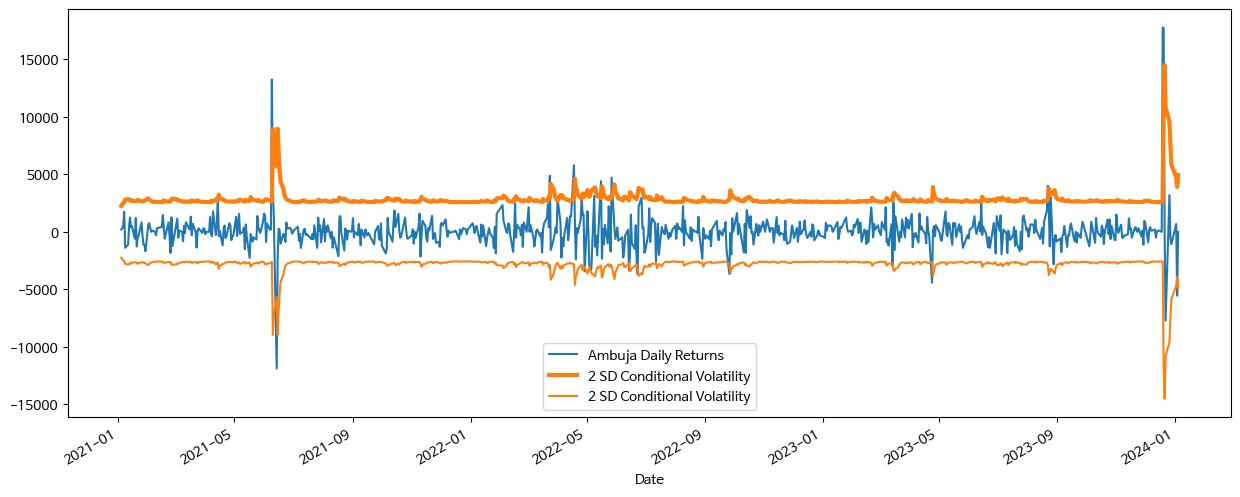

In [45]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot `y_ambuja_train`
stock_train.plot(ax=ax, label="Ambuja Daily Returns")

# Plot conditional volatility * 2
(2 * model.conditional_volatility).plot(
    ax=ax, color="C1", label = "2 SD Conditional Volatility", linewidth=3
)

# Plot conditional volatility * -2
(-2 * model.conditional_volatility).plot(
    ax=ax, color="C1", label = "2 SD Conditional Volatility", 
)

# Add axis labels
plt.xlabel("Date")

# Add legend
plt.legend();

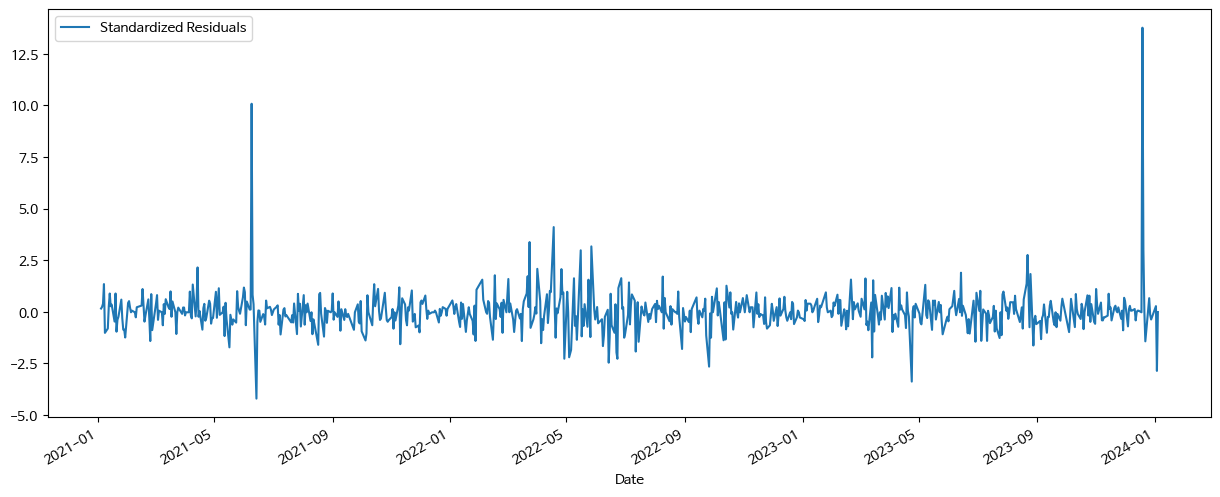

In [46]:
fix, ax = plt.subplots(figsize=(15, 6))

model.std_resid.plot(ax=ax, label="Standardized Residuals")

plt.xlabel("Date")

plt.legend();

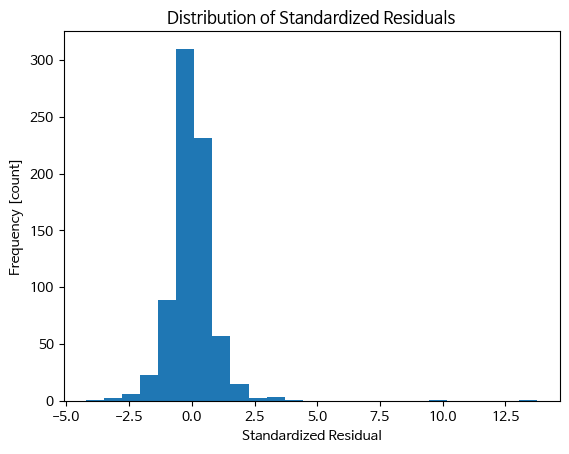

In [47]:
# Create histogram of standardized residuals, 25 bins
plt.hist(model.std_resid, bins=25)

# Add axis labels
plt.xlabel("Standardized Residual")
plt.ylabel("Frequency [count]")

# Add title
plt.title("Distribution of Standardized Residuals");

In [48]:
model.forecast(horizon=1, reindex=False).variance

,h.1
날짜,
2024-01-04,4.075028e+06
